# Technical Analysis Example

To analyze trends and identify potential trading signals for Apple (AAPL), we calculate two moving averages on the closing price: a short-term (20-day) and a longer-term (50-day) average.

In [73]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt



**Interpretation:**  
The plot shows AAPL's closing price alongside its 20-day and 50-day moving averages. Crossovers between these averages can signal shifts in trend—when the short-term average rises above the long-term, it may indicate bullish momentum, while the opposite could signal a bearish trend.

# Load the Data

Read the cleaned stock data from the CSV file and ensure the 'Date' column is in datetime format for accurate time series analysis:

In [74]:
# Load the data
df = pd.read_csv('C:/Users/Amit/Desktop/stock_market_data_analysis/notebooks/data/stock_data.csv')  # Update path as needed
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime



This prepares the DataFrame `df` for further analysis and visualization.

# Prepare Data for Forecasting

Select Apple (AAPL) data and format it for Prophet, renaming columns as required:

In [75]:
# Prepare data for forecasting
aapl = df[df['Ticker'] == 'AAPL'][['Date', 'Close']]
aapl = aapl.rename(columns={'Date': 'ds', 'Close': 'y'})




The resulting DataFrame `aapl` will have columns `ds` (date) and `y` (value), matching Prophet's input requirements.


# Train Prophet Model

Initialize and fit a Prophet model to the AAPL data:

In [76]:
# Train Prophet model
model = Prophet(daily_seasonality=False)
model.fit(aapl)

10:45:32 - cmdstanpy - INFO - Chain [1] start processing
10:45:32 - cmdstanpy - INFO - Chain [1] done processing


This trains the forecasting model on Apple's historical closing prices, capturing relevant trends and seasonality.

# Make Future Predictions

Generate a future dataframe and forecast the next 30 days using the trained Prophet model:


In [77]:
# Make future predictions
future = model.make_future_dataframe(periods=30, freq='B')
forecast = model.predict(future)


- `make_future_dataframe(periods=30)` extends the time series 30 days into the future.
- `model.predict(future)` produces forecasts for both the historical and future dates.

The resulting `forecast` DataFrame contains the predicted values and confidence intervals for each date.

# Plot the Forecast

Visualize the predicted Apple (AAPL) prices using the trained Prophet model:

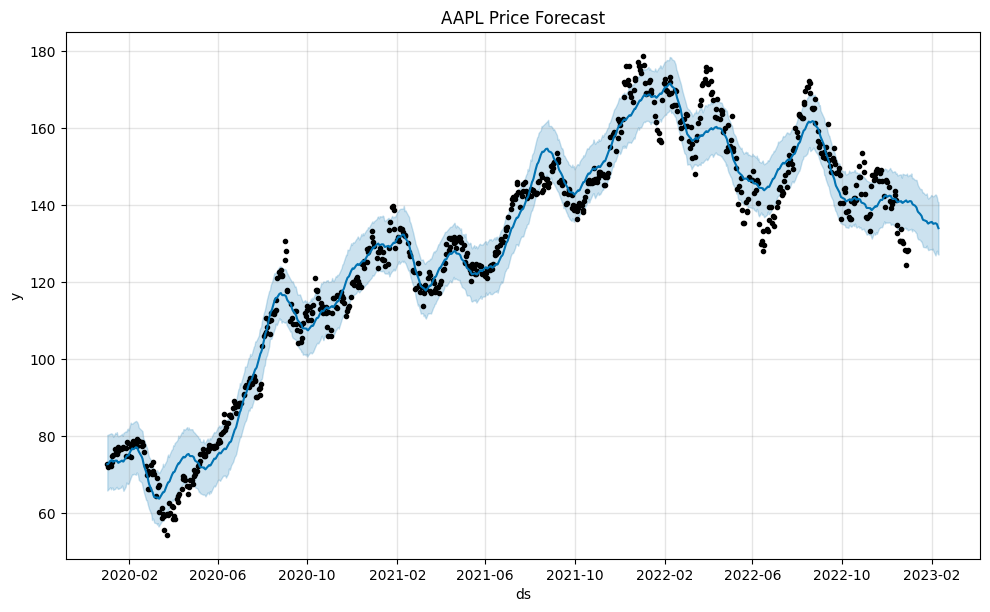

In [78]:
# Plot forecast
fig = model.plot(forecast)
plt.title('AAPL Price Forecast')
plt.show()

This generates a plot showing the historical data, forecasted values, and confidence intervals for the next 30 days.